In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors
tfpl = tfp.layers

print("TF version:", tf.__version__)
print("TFP version:", tfp.__version__)

TF version: 2.4.1
TFP version: 0.12.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bijectors and normalising flows

 ## Coding tutorials
 #### [1. Bijectors](#coding_tutorial_1)
 #### [2. The TransformedDistribution class](#coding_tutorial_2)
 #### [3. Subclassing bijectors](#coding_tutorial_3)
 #### [4. Normalising flows](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Bijectors

In [ ]:
# Define base distribution
normal = tfd.Normal(loc=0, scale=1)


In [ ]:
# Sample from base distribution
n = 1000

z=  normal.sample(n)


### Scale and shift bijector

In [ ]:
# Define scale and shift
scale = 4.5
shift = 7.


In [ ]:
# Define chain bijector

scale_and_shift = tfb.Chain([tfb.Shift(shift), tfb.Scale(scale)])

In [ ]:
# We can also use call methods
scale_transf = tfb.Scale(scale)
shift_transf = tfb.Shift(shift)
scale_and_shift = shift_transf(scale_transf)


In [ ]:
# Apply the forward transformation
x = scale_and_shift(z)


In [ ]:
# Check the forward transformation
tf.norm(x - (scale*z + shift))



<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

#### Plots

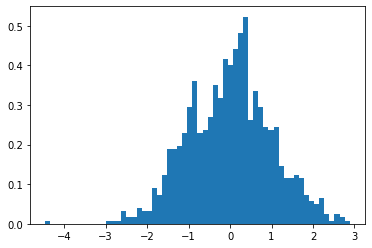

In [ ]:
# Plot z density
plt.hist(z, bins=60, density=True)
plt.show()


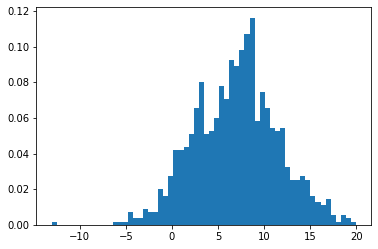

In [ ]:
# Plot x density
plt.hist(x, bins=60, density=True)
plt.show()


#### Inverse transformation

In [ ]:
# Apply inverse transformation
inv_x = scale_and_shift.inverse(x)


In [ ]:
# Check inverse transformation
tf.norm(inv_x - z)


<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

#### Log probability

In [ ]:
# Compute log prob for x

log_prob_x = normal.log_prob(z) - scale_and_shift.forward_log_det_jacobian(z, event_ndims=0)
print(log_prob_x)

tf.Tensor(
[ -3.8070555  -3.0792909  -2.4301357  -2.4399781  -3.2746253  -3.3463652
  -2.4432478  -3.3330493  -2.454855   -2.6239746  -2.683041   -4.9674387
  -2.8506124  -2.5713687  -2.471166   -2.7350397  -2.4272134  -2.458897
  -2.4326777  -3.0819254  -6.779496   -3.240857   -3.0652218  -2.424526
  -2.4844992  -2.6324368  -3.0789385  -2.9011638  -2.4650795  -2.5816278
  -3.2551408  -2.6439419  -2.6449592  -2.435289   -2.474389   -6.3526034
  -2.4247699  -5.335212   -2.7780411  -2.7394266  -2.4231126  -3.6674988
  -3.7862396  -2.51331    -2.4713402  -3.8489842  -2.4348788  -3.4268808
  -3.4793153  -3.478537   -2.7238643  -5.8253694  -2.5608525  -3.0846872
  -2.4231484  -2.4636564  -3.3420315  -2.7657437  -4.0168858  -2.7684228
  -2.4527733  -2.6683202  -2.5916896  -2.8111458  -3.3942573  -2.4417691
  -3.0573843  -3.7550015  -2.6021652  -2.4255724  -2.8732014  -2.5545382
  -2.633987   -2.577008   -2.7946477  -2.485081   -2.9592443  -2.423322
  -2.6856635  -3.6467965  -2.7859247  -3.84

In [ ]:
# We can also use the inverse transformation

log_prob_x = (normal.log_prob(scale_and_shift.inverse(x)) + scale_and_shift.inverse_log_det_jacobian(x, event_ndims=0))
print(log_prob_x)



tf.Tensor(
[ -3.8070555  -3.0792909  -2.4301357  -2.4399781  -3.2746253  -3.3463652
  -2.4432478  -3.3330493  -2.454855   -2.6239746  -2.683041   -4.9674387
  -2.8506124  -2.5713687  -2.471166   -2.7350397  -2.4272134  -2.458897
  -2.4326777  -3.0819254  -6.779496   -3.240857   -3.0652218  -2.424526
  -2.4844992  -2.6324368  -3.0789385  -2.9011638  -2.4650795  -2.5816278
  -3.2551408  -2.6439419  -2.6449592  -2.435289   -2.474389   -6.3526034
  -2.4247699  -5.335212   -2.7780411  -2.7394266  -2.4231126  -3.6674988
  -3.7862396  -2.51331    -2.4713402  -3.8489842  -2.4348788  -3.4268808
  -3.4793153  -3.478537   -2.7238643  -5.8253694  -2.5608525  -3.0846872
  -2.4231484  -2.4636564  -3.3420315  -2.7657437  -4.0168858  -2.7684228
  -2.4527733  -2.6683202  -2.5916896  -2.8111458  -3.3942573  -2.4417691
  -3.0573843  -3.7550015  -2.6021652  -2.4255724  -2.8732014  -2.5545382
  -2.633987   -2.577008   -2.7946477  -2.485081   -2.9592443  -2.423322
  -2.6856635  -3.6467965  -2.7859247  -3.84

### Broadcasting

In [ ]:
x = tf.random.normal(shape=(100, 1))

In [ ]:
# Softfloor bijector

softfloor = tfb.Softfloor(temperature=0.01)
y = softfloor.forward(x)
print(y.shape)

(100, 1)


In [ ]:
# Softfloor bijector using broadcasting
softfloor = tfb.Softfloor(temperature=[0.2, 1.])
y = softfloor.forward(x)
print(y.shape)

(100, 2)


In [ ]:
# Softfloor bijector using broadcasting

softfloor = tfb.Softfloor(temperature=[0.01, 0.1, 1.])


In [ ]:
# Plot routine

def _plot(nparams, bijector, params, x):
    bijector_params = tuple(getattr(bijector, name) for name in params)
    upper_params = [name[0].upper() + name[1:] for name in params]
    fig = plt.figure(figsize=(14, 5))
    lines = plt.plot(np.tile(x, nparams), bijector.forward(x))
    for l in zip(lines, *bijector_params):
        labels = ": {:.2f}, ".join(upper_params) + ': {:.2f}'
        l[0].set_label(labels.format(*l[1:]))
    plt.legend()
    plt.show()

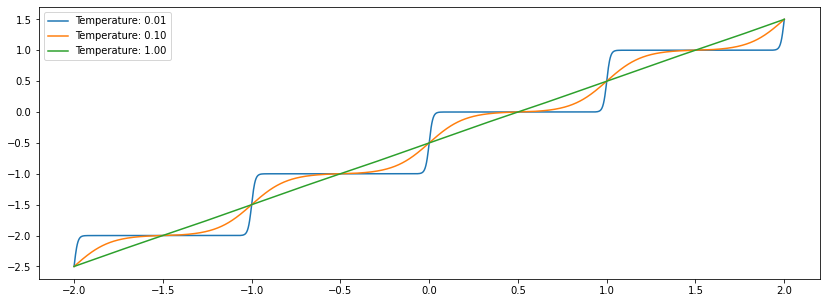

In [ ]:
# Plot

x = np.linspace(-2, 2, 2000)[..., np.newaxis]

_plot(3, softfloor, ['temperature'], x)

In [ ]:
# Gumbel bijector using broadcasting
exps = tfb.GumbelCDF(loc=[0.5, 1, 1.5, 2 ,3], scale=  [1,2,2,3,4])


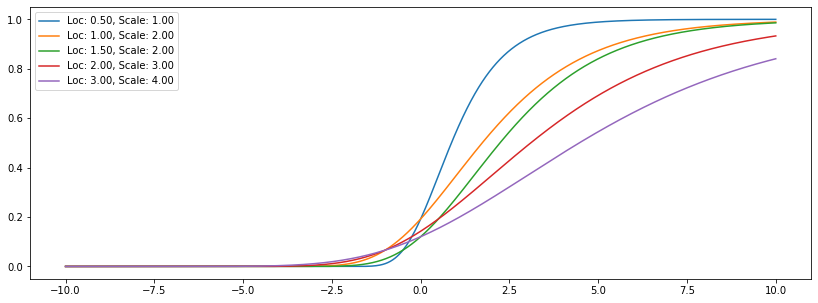

In [ ]:
# Plot

x = np.linspace(-10, 10, 2000, dtype=np.float32)[..., np.newaxis]
_plot(5, exps, ['loc', 'scale'], x)

***
<a id="coding_tutorial_2"></a>
## The TransformedDistribution class

### TransformedDistribution

In [ ]:
# Parameters

n = 10000
loc = 0
scale = 0.5

In [ ]:
# Normal distribution

normal = tfd.Normal(loc=loc, scale=scale)

In [ ]:
# Display event and batch shape

print('batch shape: ', normal.batch_shape)
print('event shape: ', normal.event_shape)

batch shape:  ()
event shape:  ()


In [ ]:
# Exponential bijector
exp = tfb.Exp()


In [ ]:
# Log normal transformed distribution using exp and normal bijectors

log_normal_tf = exp(normal)

In [ ]:
# Display event and batch shape

print('batch shape: ', log_normal_tf.batch_shape)
print('event shape: ', log_normal_tf.event_shape)


batch shape:  ()
event shape:  ()


In [ ]:
# Base distribution
z = normal.sample(n)


#### Plots

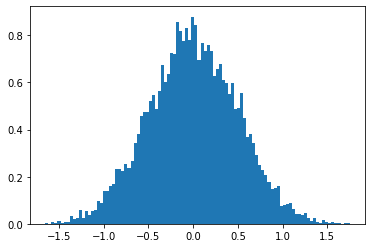

In [ ]:
# Plot z density
plt.hist(z, bins=100, density=True)
plt.show()


In [ ]:
# Transformed distribution
x = log_normal_tf.sample(n)


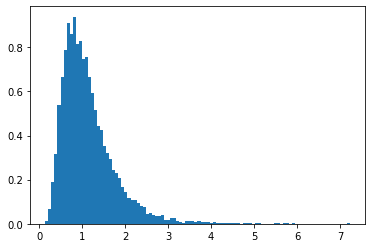

In [ ]:
# Plot x density
plt.hist(x, bins=100, density=True)
plt.show()


In [ ]:
# Define log normal distribution
log_normal = tfd.LogNormal(loc=loc, scale=scale)


In [ ]:
# Sample log_normal
l = log_normal.sample(n)


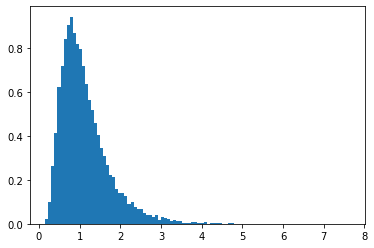

In [ ]:
# Plot l density
plt.hist(l, bins=100, density=True)
plt.show()


#### Log probability

In [ ]:
# Log prob of LogNormal
log_prob = log_normal.log_prob(x)


In [ ]:
# Log prob of log normal transformed distribution
log_prob_td = log_normal_tf.log_prob(x)


In [ ]:
# Check log probs
tf.norm(log_prob - log_prob_td)


<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

### Event shape and batch shape

In [ ]:
# Set a scaling lower triangular matrix
tril = tf.random.normal((2,4,4))
scale_low_tri = tf.linalg.LinearOperatorLowerTriangular(tril)



In [ ]:
# View of scale_low_tri
scale_low_tri.to_dense()


<tf.Tensor: shape=(2, 4, 4), dtype=float32, numpy=
array([[[ 0.512455  ,  0.        ,  0.        ,  0.        ],
        [ 1.0926976 , -0.25638717,  0.        ,  0.        ],
        [-0.83236736, -0.9161215 , -0.400965  ,  0.        ],
        [ 0.23955458,  0.48372224, -1.0085161 ,  0.8529163 ]],

       [[-0.5380993 ,  0.        ,  0.        ,  0.        ],
        [ 1.7524354 ,  0.74942935,  0.        ,  0.        ],
        [-0.09392989,  0.9201712 , -1.8914483 ,  0.        ],
        [-0.7175575 , -0.12203344, -1.4318887 ,  0.2804436 ]]],
      dtype=float32)>

In [ ]:
# Define scale linear operator

scale_lin_op = tfb.ScaleMatvecLinearOperator(scale_low_tri)

In [ ]:
# Define scale linear operator transformed distribution with a batch and event shape
normal = tfd.MultivariateNormalDiag(loc=[[0, 0, 0, 0], [0, 0, 0, 0]], scale_diag=[[1, 1, 1, 1], [1, 1, 1, 1]])
mvn = tfd.TransformedDistribution(normal, scale_lin_op)
print(mvn)

tfp.distributions.TransformedDistribution("scale_matvec_linear_operatorMultivariateNormalDiag", batch_shape=[2], event_shape=[4], dtype=float32)


In [ ]:
# Display event and batch shape

print('batch shape: ', mvn.batch_shape)
print('event shape: ', mvn.event_shape)


batch shape:  (2,)
event shape:  (4,)


In [ ]:
# Sample
y1 = mvn.sample(sample_shape=(n,))
y1.shape


TensorShape([10000, 2, 4])

In [ ]:
# Define a MultivariateNormalLinearOperator distribution

mvn2 = tfd.MultivariateNormalLinearOperator(loc=0, scale= scale_low_tri)
print(mvn2)


tfp.distributions.MultivariateNormalLinearOperator("MultivariateNormalLinearOperator", batch_shape=[2], event_shape=[4], dtype=float32)


In [ ]:
# Display event and batch shape

print('batch shape: ', mvn2.batch_shape)
print('event shape: ', mvn2.event_shape)


batch shape:  (2,)
event shape:  (4,)


In [ ]:
# Sample
y2 = mvn2.sample((n,))
print(y2.shape)


(10000, 2, 4)


In [ ]:
# Check
xn = normal.sample((n,2,4))
print(tf.norm(mvn.log_prob(xn) - mvn2.log_prob(xn)))


tf.Tensor(0.0, shape=(), dtype=float32)


***
<a id="coding_tutorial_3"></a>
## Subclassing bijectors

In [3]:
# Define a new bijector: Cubic

# If input parameters are a and b that we want to apply to input tensor x
#Then output is (ax + b)^3

class Cubic(tfb.Bijector):

    def __init__(self, a, b, validate_args=False, name='Cubic'):
        self.a = tf.cast(a, tf.float32)
        self.b = tf.cast(b, tf.float32)
        if validate_args:
            assert tf.reduce_mean(tf.cast(tf.math.greater_equal(tf.abs(self.a), 1e-5), tf.float32)) == 1.0
            assert tf.reduce_mean(tf.cast(tf.math.greater_equal(tf.abs(self.b), 1e-5), tf.float32)) == 1.0
        super(Cubic, self).__init__(
            validate_args=validate_args, forward_min_event_ndims=0, name=name)
        
    def _forward(self, x):
      x = tf.cast(x, tf.float32)
      return tf.squeeze(tf.pow(self.a * x + self.b, 3))

    def _inverse(self, y):
      y = tf.cast(y, tf.float32)
      return (tf.math.sign(y) * tf.pow(tf.abs(y), 1/3) - self.b) / self.a

    def _forward_log_det_jacobian(self, x):
      x = tf.cast(x, tf.float32)
      return tf.math.log(3. * tf.abs(self.a)) + 2. * tf.math.log(tf.abs(self.a * x + self.b))
      


In [4]:
# Cubic bijector

cubic = Cubic([1.0, -2.0], [-1.0, 0.4], validate_args=True)

In [5]:
# Apply forward transformation
x = tf.constant([[1,2], [3,4]])
y = cubic.forward(x)
print(y)

tf.Tensor(
[[   0.        -46.655994]
 [   8.       -438.97598 ]], shape=(2, 2), dtype=float32)


In [6]:
# Check inverse

np.linalg.norm(x - cubic.inverse(y))

0.0

#### Function plots

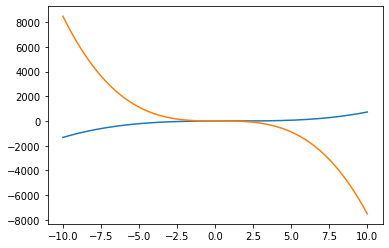

In [7]:
# Plot the forward transformation

x = np.linspace(-10, 10, 500).reshape(-1, 1)
plt.plot(x, cubic.forward(x))

In [8]:
# Display shape
print(cubic.forward(x).shape)


(500, 2)


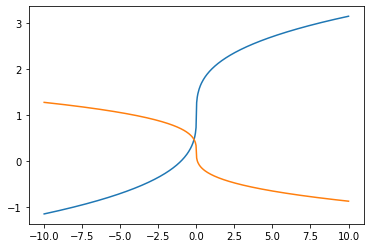

In [9]:
# Plot the inverse
plt.plot(x, cubic.inverse(x))


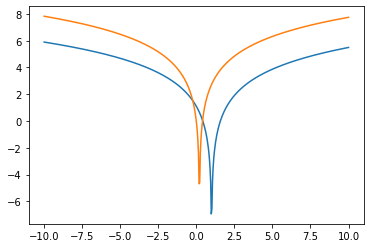

In [10]:
# Plot the forward log Jacobian determinant
plt.plot(x, cubic.forward_log_det_jacobian(x, event_ndims=0))



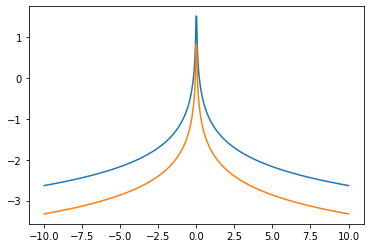

In [11]:
# Plot the inverse log Jacobian determinant
plt.plot(x, cubic.inverse_log_det_jacobian(x, event_ndims=0))



#### TransformedDistribution and plots

In [12]:
# Create a transformed distribution with Cubic
normal = tfd.MultivariateNormalDiag(loc=[0., 0.], scale_diag=[1., 1.])
cubed_normal = tfd.TransformedDistribution(normal, cubic)
cubed_normal

<tfp.distributions.TransformedDistribution 'CubicMultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

In [ ]:
# Sample cubed_normal
n = 1000
g = cubed_normal.sample(n)
print(g.shape)


(1000, 2)


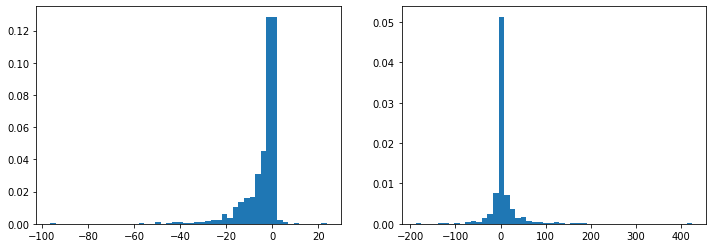

In [ ]:
# Plot histograms

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(g[..., 0], bins=50, density=True)
plt.subplot(1, 2, 2)
plt.hist(g[..., 1], bins=50, density=True)
plt.show()

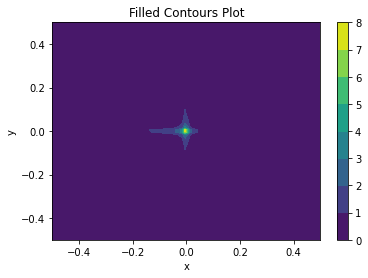

In [ ]:
# Make contour plot

xx = np.linspace(-0.5, 0.5, 100)
yy = np.linspace(-0.5, 0.5, 100)
X, Y = np.meshgrid(xx, yy)

fig,ax=plt.subplots(1,1)
Z = cubed_normal.prob(np.dstack((X, Y)))
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [ ]:
# Create a transformed distribution with the inverse of Cube
inverse_cubic = tfb.Invert(cubic)
inv_cubed_normal = inverse_cubic(normal)
inv_cubed_normal

<tfp.distributions.TransformedDistribution 'invert_CubicMultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

In [ ]:
# Samble inv_cubed_normal
n = 1000
g = inv_cubed_normal.sample(n)
g.shape

TensorShape([1000, 2])

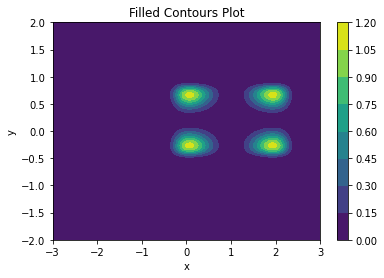

In [ ]:
# Make contour plot

xx = np.linspace(-3.0, 3.0, 100)
yy = np.linspace(-2.0, 2.0, 100)
X, Y = np.meshgrid(xx, yy)

fig,ax=plt.subplots(1,1)
Z = inv_cubed_normal.prob(np.dstack((X, Y)))
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

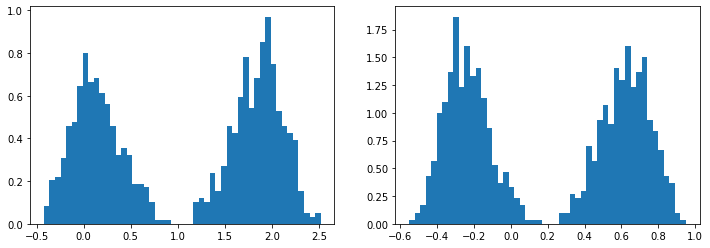

In [ ]:
# Plot histograms

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(g[..., 0], bins=50, density=True)
plt.subplot(1, 2, 2)
plt.hist(g[..., 1], bins=50, density=True)
plt.show()

#### Training the bijector

In [ ]:
# Create a mixture of four Gaussians
probs = [0.45, 0.55]
mix_gauss = tfd.Mixture(
    cat = tfd.Categorical(probs=probs),
    components = [tfd.Normal(loc=2.3, scale=0.4), tfd.Normal(loc=-0.8, scale=0.4)]
)


In [ ]:
# Create the dataset

x_train = mix_gauss.sample(10000)
x_train = tf.data.Dataset.from_tensor_slices(x_train)
x_train = x_train.batch(128)

x_valid = mix_gauss.sample(1000)
x_valid = tf.data.Dataset.from_tensor_slices(x_valid)
x_valid = x_valid.batch(128)

print(x_train.element_spec)
print(x_valid.element_spec)

TensorSpec(shape=(None,), dtype=tf.float32, name=None)
TensorSpec(shape=(None,), dtype=tf.float32, name=None)


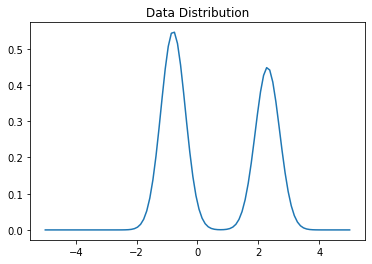

In [ ]:
# Plot the data distribution

x = np.linspace(-5, 5, 100)
plt.plot(x, mix_gauss.prob(x))
plt.title('Data Distribution')
plt.show()

In [ ]:
# Make a trainable bijector
trainable_inv_cubic = tfb.Invert(Cubic(tf.Variable(0.25), tf.Variable(-0.1)))
trainable_inv_cubic.trainable_variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.25>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.1>)

In [ ]:
# Make a trainable transformed distribution
normal = tfd.Normal(loc=0., scale=1.)
trainable_dist = tfd.TransformedDistribution(normal, trainable_inv_cubic)
trainable_dist

<tfp.distributions.TransformedDistribution 'invert_CubicNormal' batch_shape=[] event_shape=[] dtype=float32>

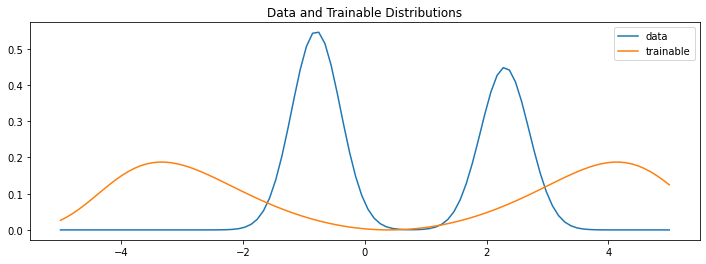

In [ ]:
# Plot the data and learned distributions
x = np.linspace(-5, 5, 100)
plt.figure(figsize=(12, 4))
plt.plot(x, mix_gauss.prob(x), label='data')
plt.plot(x, trainable_dist.prob(x), label='trainable')
plt.legend()
plt.title('Data and Trainable Distributions')
plt.show()


In [ ]:
# Train the bijector

num_epochs = 15
opt = tf.keras.optimizers.Adam()
train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    print("Epoch {}...".format(epoch))
    train_loss = tf.keras.metrics.Mean()
    val_loss = tf.keras.metrics.Mean()
    for train_batch in x_train:
        with tf.GradientTape() as tape:
            tape.watch(trainable_inv_cubic.trainable_variables)
            loss = -trainable_dist.log_prob(train_batch)
        train_loss(loss)
        grads = tape.gradient(loss, trainable_inv_cubic.trainable_variables)
        opt.apply_gradients(zip(grads, trainable_inv_cubic.trainable_variables))
    train_losses.append(train_loss.result().numpy())
        
    # Validation
    for valid_batch in x_valid:
        loss = -trainable_dist.log_prob(valid_batch)
        val_loss(loss)
    valid_losses.append(val_loss.result().numpy())

Epoch 0...
Epoch 1...
Epoch 2...
Epoch 3...
Epoch 4...
Epoch 5...
Epoch 6...
Epoch 7...
Epoch 8...
Epoch 9...
Epoch 10...
Epoch 11...
Epoch 12...
Epoch 13...
Epoch 14...


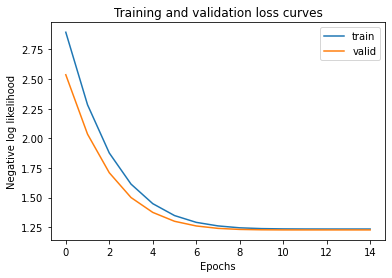

In [ ]:
# Plot the learning curves

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Negative log likelihood")
plt.title("Training and validation loss curves")
plt.show()

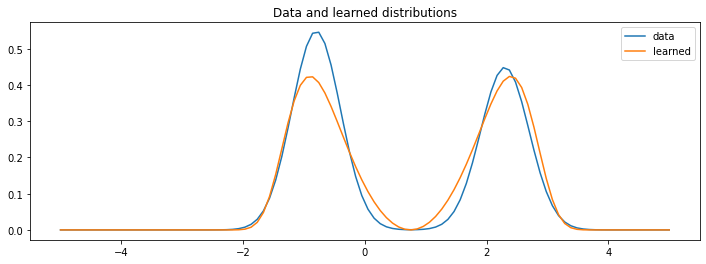

In [ ]:
# Plot the data and learned distributions

x = np.linspace(-5, 5, 100)
plt.figure(figsize=(12, 4))
plt.plot(x, mix_gauss.prob(x), label='data')
plt.plot(x, trainable_dist.prob(x), label='learned')
plt.legend()
plt.title('Data and learned distributions')
plt.show()

In [ ]:
# Display trainable variables

trainable_dist.trainable_variables

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.56618094>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.42394358>)

***
<a id="coding_tutorial_4"></a>
## Normalising flows

In [ ]:
# Load dataset

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
n_samples = 1000
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
X_data = StandardScaler().fit_transform(X)
xlim, ylim = [-2, 2], [-2, 2]

(-2.0, 2.0)

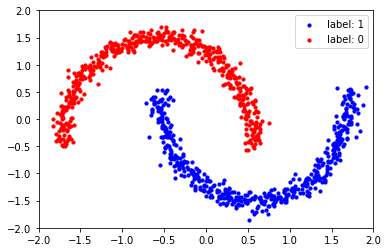

In [ ]:
# Plot with labels

y_label = y.astype(np.bool)
X_train, Y_train = X_data[..., 0], X_data[..., 1]
plt.scatter(X_train[y_label], Y_train[y_label], s=10, color='blue')
plt.scatter(X_train[y_label == False], Y_train[y_label == False], s=10, color='red')
plt.legend(['label: 1', 'label: 0'])
plt.xlim(xlim)
plt.ylim(ylim)

In [ ]:
# Define base distribution

base_distribution = tfd.MultivariateNormalDiag(loc=[0.0, 0], scale_diag=[1, 1])

In [ ]:
# Define the trainable distribution
def make_masked_autoregressive_flow(hidden_units=[16, 16], activation='relu'):
  made = tfb.AutoregressiveNetwork(
      params = 2, event_shape=[2], 
      hidden_units = hidden_units, activation=activation
  )
  return tfb.MaskedAutoregressiveFlow(shift_and_log_scale_fn=made)

trainable_distribution = tfd.TransformedDistribution(base_distribution, 
                                                     make_masked_autoregressive_flow(),
                                                     )


In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tensorflow.compat.v1 import logging
logging.set_verbosity(logging.ERROR)

In [ ]:
# Define a plot contour routine

def plot_contour_prob(dist, rows=1, title=[''], scale_fig=4):
    cols = int(len(dist) / rows)
    xx = np.linspace(-5.0, 5.0, 100)
    yy = np.linspace(-5.0, 5.0, 100)
    X, Y = np.meshgrid(xx, yy)

    fig, ax = plt.subplots(rows, cols, figsize=(scale_fig * cols, scale_fig * rows))
    fig.tight_layout(pad=4.5)

    i = 0
    for r in range(rows):
        for c in range(cols):
            Z = dist[i].prob(np.dstack((X, Y)))
            if len(dist) == 1:
                axi = ax
            elif rows == 1:
                axi = ax[c]
            else:
                axi = ax[r, c]

            # Plot contour
            p = axi.contourf(X, Y, Z)

            # Add a colorbar
            divider = make_axes_locatable(axi)
            cax = divider.append_axes("right", size="5%", pad=0.1)
            cbar = fig.colorbar(p, cax=cax)

            # Set title and labels
            axi.set_title('Filled Contours Plot: ' + str(title[i]))
            axi.set_xlabel('x')
            axi.set_ylabel('y')

            i += 1
    plt.show()

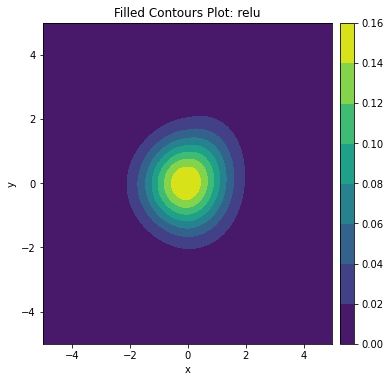

In [ ]:
# Plot contour
activation = 'relu'
maf = tfd.TransformedDistribution(base_distribution,
                                  make_masked_autoregressive_flow(activation=activation))
plot_contour_prob([maf], scale_fig=6, title=[activation])


In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras import Model

In [ ]:
# Make samples
x = base_distribution.sample((1000, 2))
names = [base_distribution.name, trainable_distribution.bijector.name]
samples = [x, trainable_distribution.bijector.forward(x)]


In [ ]:
# Define a scatter plot routine for the bijectors

def _plot(results, rows=1, legend=False):
    cols = int(len(results) / rows)
    f, arr = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    i = 0
    for r in range(rows):
        for c in range(cols):
            res = results[i]
            X, Y = res[..., 0].numpy(), res[..., 1].numpy()
            if rows == 1:
                p = arr[c]
            else:
                p = arr[r, c]
            p.scatter(X, Y, s=10, color='red')
            p.set_xlim([-5, 5])
            p.set_ylim([-5, 5])
            p.set_title(names[i])
            
            i += 1

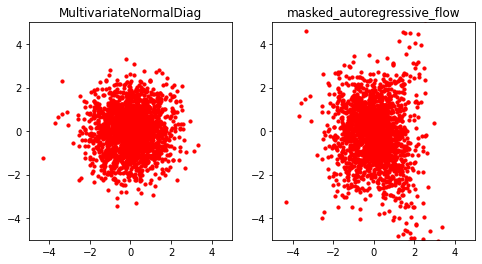

In [ ]:
# Plot
_plot(samples)


#### Training a MaskedAutoregressiveFlow bijector

In [ ]:
from tensorflow.keras.callbacks import LambdaCallback

In [ ]:
# Define a training routine

def train_dist_routine(trainable_distribution, n_epochs=200, batch_size=None, n_disp=100):
    x_ = Input(shape=(2,), dtype=tf.float32)
    log_prob_ = trainable_distribution.log_prob(x_)
    model = Model(x_, log_prob_)

    model.compile(optimizer=tf.optimizers.Adam(),
                  loss=lambda _, log_prob: -log_prob)

    ns = X_data.shape[0]
    if batch_size is None:
        batch_size = ns

    # Display the loss every n_disp epoch
    epoch_callback = LambdaCallback(
        on_epoch_end=lambda epoch, logs: 
                        print('\n Epoch {}/{}'.format(epoch+1, n_epochs, logs),
                              '\n\t ' + (': {:.4f}, '.join(logs.keys()) + ': {:.4f}').format(*logs.values()))
                                       if epoch % n_disp == 0 else False 
    )


    history = model.fit(x=X_data,
                        y=np.zeros((ns, 0), dtype=np.float32),
                        batch_size=batch_size,
                        epochs=n_epochs,
                        validation_split=0.2,
                        shuffle=True,
                        verbose=False,
                        callbacks=[epoch_callback])
    return history

In [ ]:
# Train the distribution

history = train_dist_routine(trainable_distribution, 600, n_disp=50)


 Epoch 1/600 
	 loss: 2.9414, val_loss: 2.8984

 Epoch 51/600 
	 loss: 2.7642, val_loss: 2.7410

 Epoch 101/600 
	 loss: 2.6681, val_loss: 2.6540

 Epoch 151/600 
	 loss: 2.6096, val_loss: 2.5946

 Epoch 201/600 
	 loss: 2.5581, val_loss: 2.5411

 Epoch 251/600 
	 loss: 2.4782, val_loss: 2.4604

 Epoch 301/600 
	 loss: 2.3673, val_loss: 2.3587

 Epoch 351/600 
	 loss: 2.2615, val_loss: 2.2807

 Epoch 401/600 
	 loss: 2.1871, val_loss: 2.2371

 Epoch 451/600 
	 loss: 2.1383, val_loss: 2.2121

 Epoch 501/600 
	 loss: 2.0971, val_loss: 2.1881

 Epoch 551/600 
	 loss: 2.0648, val_loss: 2.1646


In [ ]:
# Get losses

train_losses = history.history['loss']
valid_losses = history.history['val_loss']

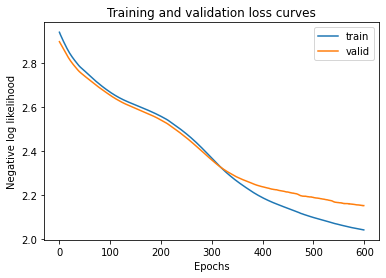

In [ ]:
# Plot loss vs epoch

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Negative log likelihood")
plt.title("Training and validation loss curves")
plt.show()

In [ ]:
# Make samples
x = base_distribution.sample((1000, 2))
names = [base_distribution.name, trainable_distribution.bijector.name]
samples = [x, trainable_distribution.bijector.forward(x)]


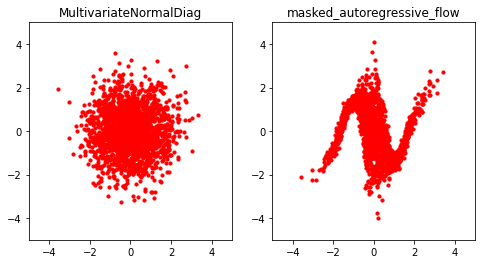

In [ ]:
# Plot
_plot(samples)


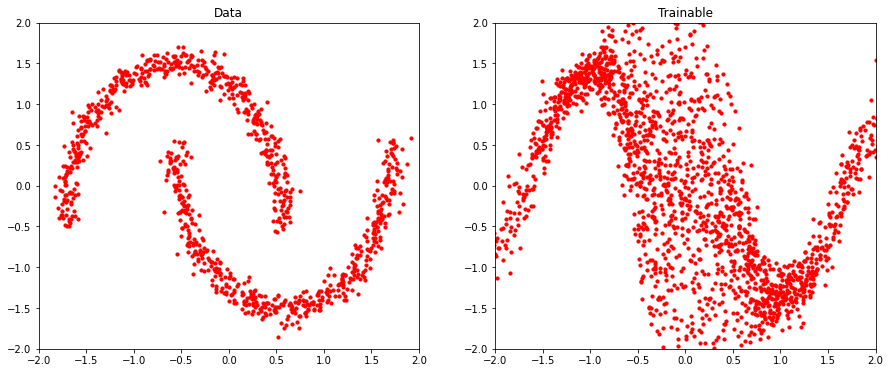

In [ ]:
# Define a plot routine

def visualize_training_data(samples):
    f, arr = plt.subplots(1, 2, figsize=(15, 6))
    names = ['Data', 'Trainable']
    samples = [tf.constant(X_data), samples[-1]]

    for i in range(2):
        res = samples[i]
        X, Y = res[..., 0].numpy(), res[..., 1].numpy()
        arr[i].scatter(X, Y, s=10, color='red')
        arr[i].set_xlim([-2, 2])
        arr[i].set_ylim([-2, 2])
        arr[i].set_title(names[i])

visualize_training_data(samples)

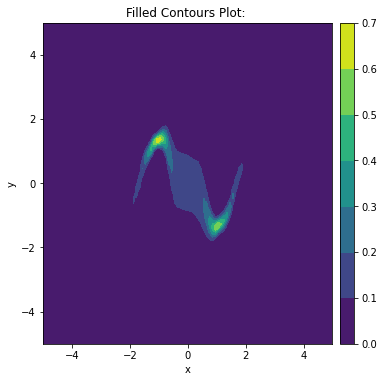

In [ ]:
# Plot contour
plot_contour_prob([trainable_distribution], scale_fig=6)


#### Training a chain of MaskedAutoregressiveFlow bijectors

In [ ]:
# Define a more expressive model

num_bijectors = 6
bijectors = []

for i in range(num_bijectors):
  masked_auto_i = make_masked_autoregressive_flow([256,256], 'relu')
  bijectors.append(masked_auto_i)
  bijectors.append(tfb.Permute([1,0]))

flow_bijector = tfb.Chain(list(reversed(bijectors[:-1])))

In [ ]:
# Define the trainable distribution
trainable_distribution = tfd.TransformedDistribution(base_distribution,
                                                     flow_bijector)


In [ ]:
# Make samples

def make_samples():
    x = base_distribution.sample((1000, 2))
    samples = [x]
    names = [base_distribution.name]
    for bijector in reversed(trainable_distribution.bijector.bijectors):
        x = bijector.forward(x)
        samples.append(x)
        names.append(bijector.name)
    return names, samples

names, samples = make_samples()

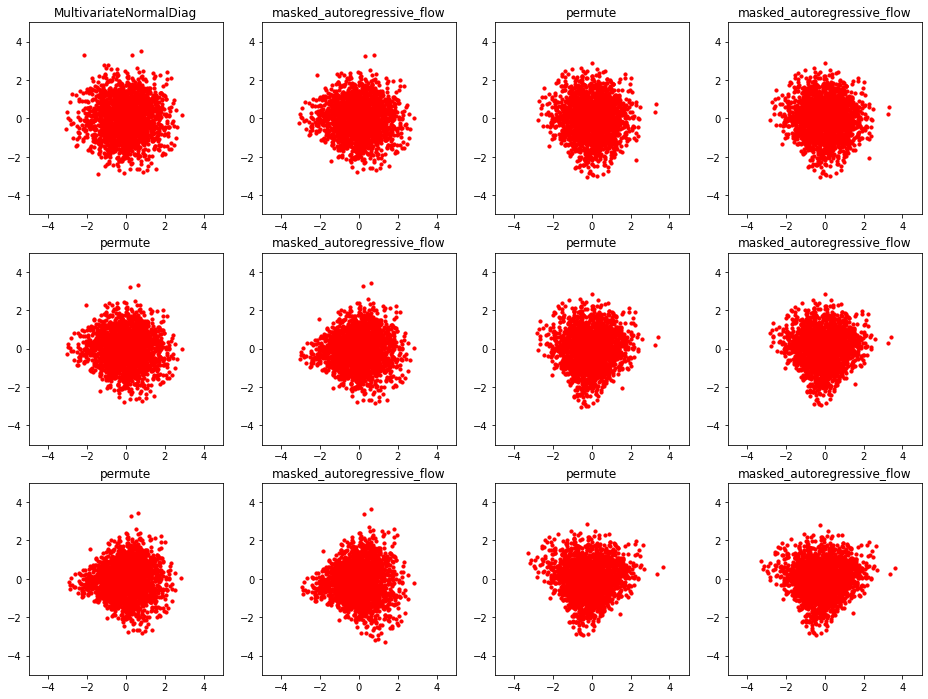

In [ ]:
# Plot
_plot(samples, 3)



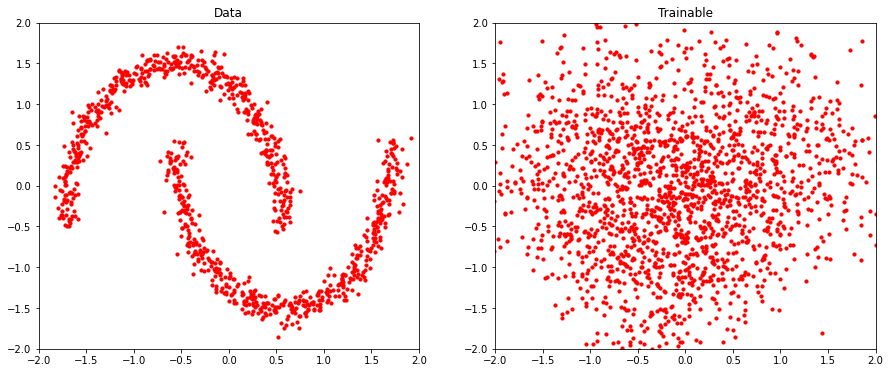

In [ ]:
# Plot
visualize_training_data(samples)


In [ ]:
# Train the distribution

history = train_dist_routine(trainable_distribution, 600, n_disp=50)


 Epoch 1/600 
	 loss: 2.9745, val_loss: 2.6790

 Epoch 51/600 
	 loss: 2.0985, val_loss: 2.1150

 Epoch 101/600 
	 loss: 1.8842, val_loss: 1.8904

 Epoch 151/600 
	 loss: 1.6166, val_loss: 1.7720

 Epoch 201/600 
	 loss: 1.5548, val_loss: 1.7739

 Epoch 251/600 
	 loss: 1.3220, val_loss: 1.6011

 Epoch 301/600 
	 loss: 1.2043, val_loss: 1.4520

 Epoch 351/600 
	 loss: 1.2087, val_loss: 1.4926

 Epoch 401/600 
	 loss: 1.1873, val_loss: 1.5504

 Epoch 451/600 
	 loss: 1.1947, val_loss: 1.3713

 Epoch 501/600 
	 loss: 1.2167, val_loss: 1.3534

 Epoch 551/600 
	 loss: 1.1310, val_loss: 1.4560


In [ ]:
# Get losses

train_losses = history.history['loss']
valid_losses = history.history['val_loss']

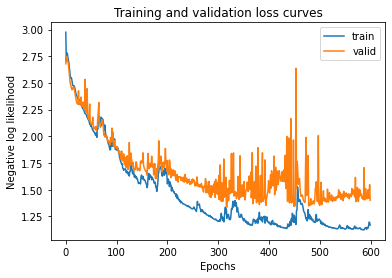

In [ ]:
# Plot loss vs epoch

plt.plot(train_losses, label='train')
plt.plot(valid_losses, label='valid')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Negative log likelihood")
plt.title("Training and validation loss curves")
plt.show()

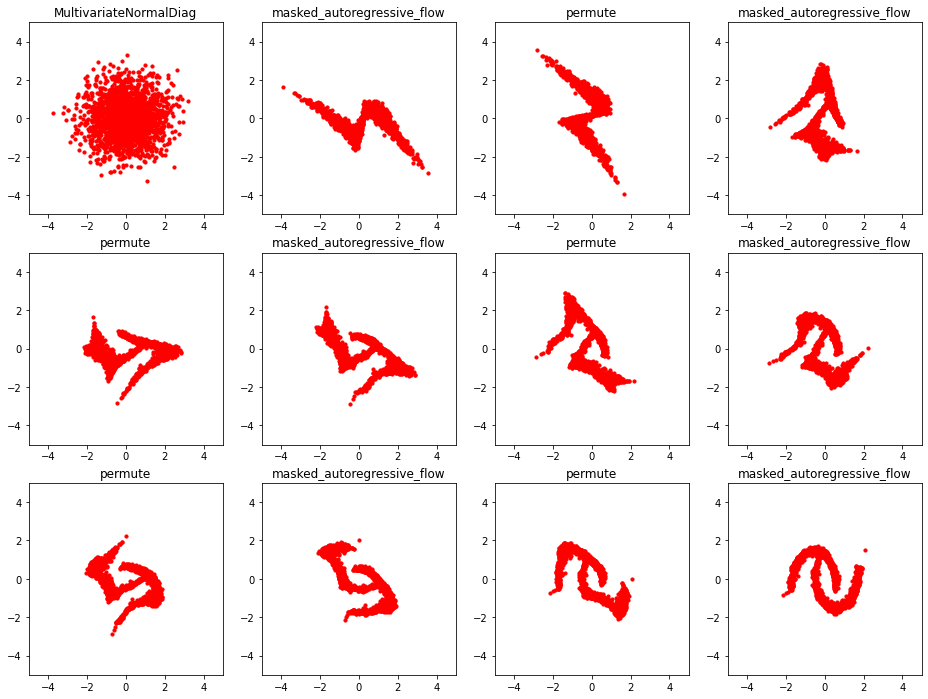

In [ ]:
# Make samples and plot
names, samples = make_samples()
_plot(samples, 3)

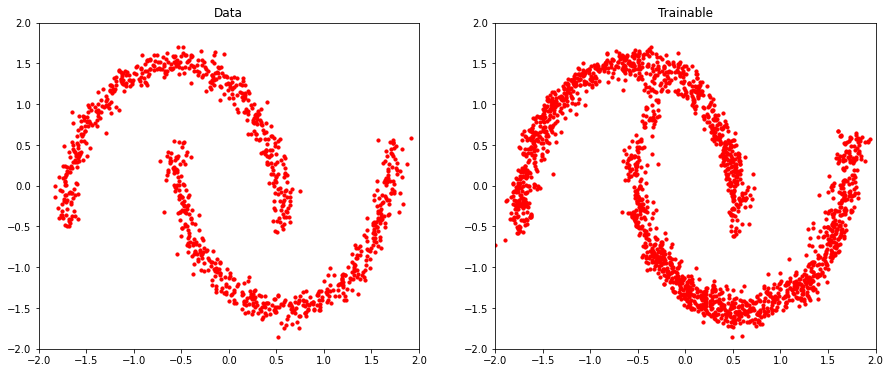

In [ ]:
# Plot
visualize_training_data(samples)


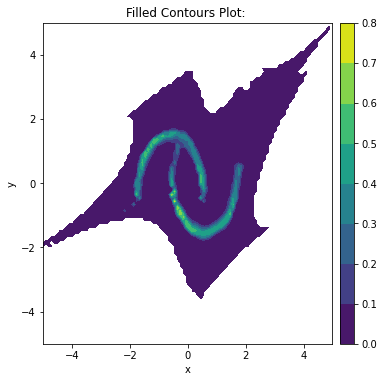

In [ ]:
# Plot

plot_contour_prob([trainable_distribution], scale_fig=6)